# Lab 5 : Clustering Part 2

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import collections
import queue
import scipy.io as spio

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


(700, 2)
(1000, 2)
(1100, 2)


<ipython-input-2-7558f96064c6>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append((NoisyPtsonCirle(100,300)))  # 1000 X 2
<ipython-input-2-7558f96064c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(100)])  # 1100 X 2


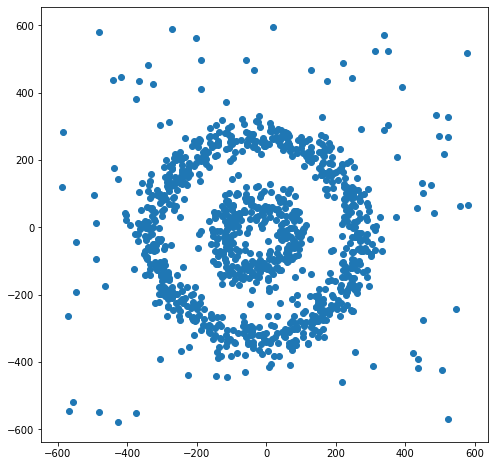

In [ ]:
## write your code here
def NoisyPtsonCirle(r,n):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

np.random.seed(42)
# Creating data set in the form of concentric circles
dataset = pd.DataFrame((NoisyPtsonCirle(300,700)))  # 700 X 2
print(dataset.shape)
dataset = dataset.append((NoisyPtsonCirle(100,300)))  # 1000 X 2 
print(dataset.shape)
# Adding noise to the dataset
dataset = dataset.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(100)])  # 1100 X 2
print(dataset.shape)

labels = np.concatenate((0*np.ones((700,1),dtype='int'),1*np.ones((300,1),dtype='int'),2*np.ones((100,1),dtype='int')), axis=0) # 1100 X 1

dataset_np = np.array(dataset) # 1100 X 2

colors=['red','blue','green','purple']
plt.figure(figsize=(8,8))
plt.scatter(dataset[0],dataset[1])
# plt.title('True Clusters',fontsize=20)
# plt.xlabel('x',fontsize=14)
# plt.ylabel('y',fontsize=14)
# plt.show()

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

Set eps = 30, Minpoints = 5


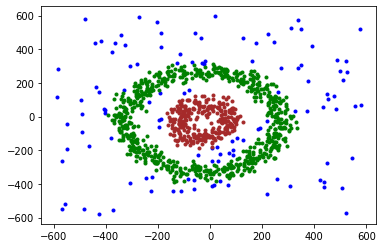

number of cluster found: 2
Counter({1: 688, 2: 295, 0: 117})
numbrer of outliers found: 117



In [ ]:
## Write your code here
#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to luster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')


#Load Data
# raw = spio.loadmat('DBSCAN.mat')
# train = raw['Points']
train=dataset_np

#Set EPS and Minpoint
epss = [30]
minptss = [5]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

Set eps = 30, Minpoints = 5


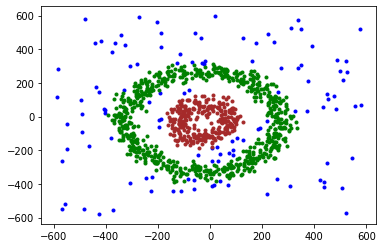

number of cluster found: 2
Counter({1: 688, 2: 295, 0: 117})
numbrer of outliers found: 117

Set eps = 30, Minpoints = 6


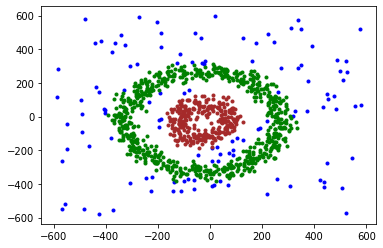

number of cluster found: 2
Counter({1: 685, 2: 295, 0: 120})
numbrer of outliers found: 120

Set eps = 30, Minpoints = 7


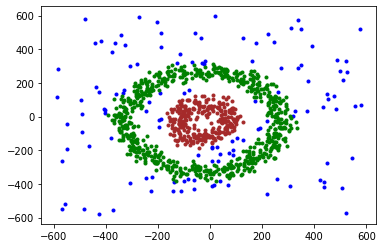

number of cluster found: 2
Counter({1: 681, 2: 294, 0: 125})
numbrer of outliers found: 125

Set eps = 40, Minpoints = 5


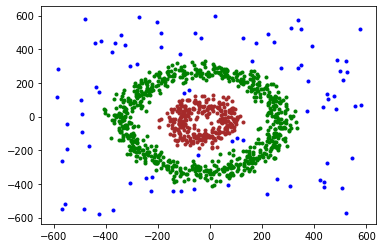

number of cluster found: 2
Counter({1: 716, 2: 300, 0: 84})
numbrer of outliers found: 84

Set eps = 40, Minpoints = 6


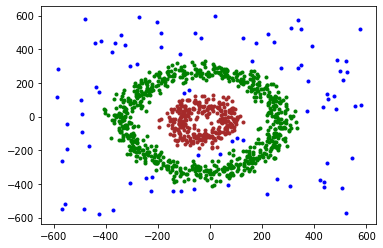

number of cluster found: 2
Counter({1: 715, 2: 300, 0: 85})
numbrer of outliers found: 85

Set eps = 40, Minpoints = 7


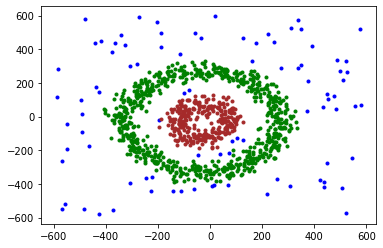

number of cluster found: 2
Counter({1: 712, 2: 299, 0: 89})
numbrer of outliers found: 89

Set eps = 50, Minpoints = 5


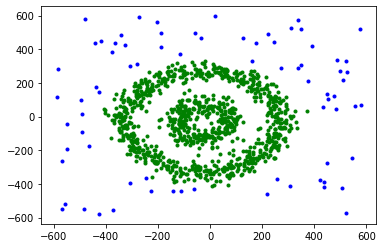

number of cluster found: 1
Counter({1: 1025, 0: 75})
numbrer of outliers found: 75

Set eps = 50, Minpoints = 6


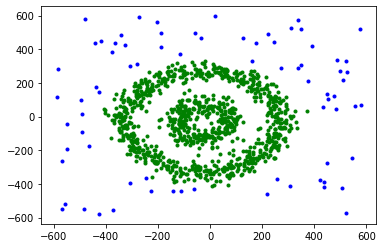

number of cluster found: 1
Counter({1: 1025, 0: 75})
numbrer of outliers found: 75

Set eps = 50, Minpoints = 7


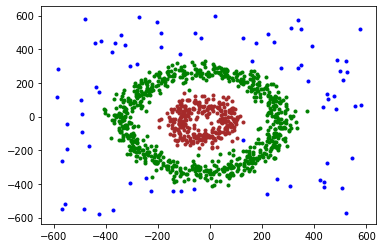

number of cluster found: 2
Counter({1: 721, 2: 303, 0: 76})
numbrer of outliers found: 76



In [ ]:
## write your code here

#Set EPS and Minpoint
epss = [30,40,50]
minptss = [5,6,7]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

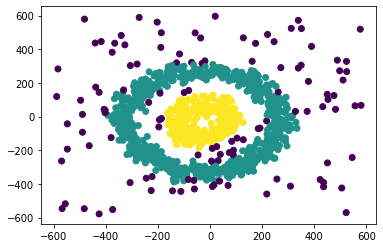

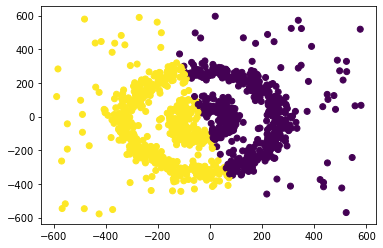

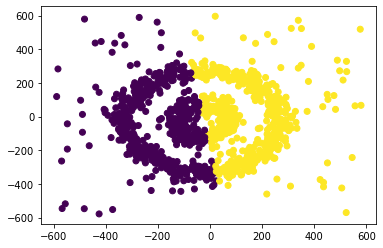

In [ ]:
from sklearn.cluster import DBSCAN
## write your code here
y_pred = DBSCAN(eps=30, min_samples=5).fit_predict(dataset_np)
plt.scatter(dataset_np[:,0], dataset_np[:,1], c=y_pred)
plt.show()

########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
gmm=GaussianMixture(n_components=2)
gmm = gmm.fit(dataset_np)

# TODO: predict the clustering labels for the dataset
pred_gmm = gmm.predict(dataset_np)

# Plot the clusters  
plt.figure()
plt.scatter(dataset_np[:,0], dataset_np[:,1], c=pred_gmm)
plt.show()

########################################################################
from sklearn.cluster import KMeans
## write your code here  

kmeans = KMeans(n_clusters=2, n_init=20)
pred = kmeans.fit_predict(dataset_np)
plt.figure()
plt.scatter(dataset_np[:,0], dataset_np[:,1], c=pred)
plt.show()

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [ ]:
def Euclidian_Dist(x,y):
  
  return  np.linalg.norm(x-y)   ## write your code here

def Dist_mat(X):
## write your code here  
  m=np.zeros((len(X),len(X)))
  for i in range(0,len(X)):
    for j in range(0,len(X)):
      if i==j:
        m[i][j]='inf'
      else:
        m[i][j]=Euclidian_Dist(X[i],X[j])
 
  
  return m

def combine(X):
  ## write your code here
  
  matrix=Dist_mat(X.T)
  print(matrix)
  m=np.min(matrix)
  ind=np.where(matrix==m)
  X=X.transpose()
  newX=0.5*(X[ind[0][0]]+X[ind[0][1]])
  for i in range(len(X)):
    if i==ind[0][0] or i == ind[0][1]:
      continue
    else:
      newX=np.append(newX,X[i])
      
  return newX.reshape(len(X)-1,2)


[[       inf 1.         5.         6.40312424 7.43303437]
 [1.                inf 4.24264069 5.65685425 6.72681202]
 [5.         4.24264069        inf 1.41421356 2.5       ]
 [6.40312424 5.65685425 1.41421356        inf 1.11803399]
 [7.43303437 6.72681202 2.5        1.11803399        inf]]

 Mean of cluster after iteration
[[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[       inf 4.60977223 6.02079729 7.07106781]
 [4.60977223        inf 1.41421356 2.5       ]
 [6.02079729 1.41421356        inf 1.11803399]
 [7.07106781 2.5        1.11803399        inf]]

 Mean of cluster after iteration
[[6.25 1.5  5.  ]
 [5.5  1.   4.  ]]
[[       inf 6.54312616 1.95256242]
 [6.54312616        inf 4.60977223]
 [1.95256242 4.60977223        inf]]

 Mean of cluster after iteration
[[5.625 1.5  ]
 [4.75  1.   ]]
[[       inf 5.57477578]
 [5.57477578        inf]]

 Mean of cluster after iteration
[[3.5625]
 [2.875 ]]


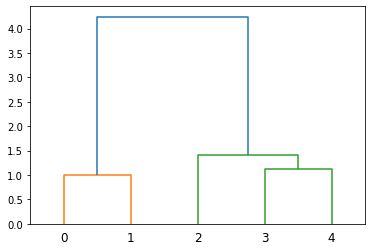

In [ ]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X.reshape(5,2)
X=X.transpose()
# print(X)
## write your code here
newX=combine(X)
# print(len(newX))
print('\n Mean of cluster after iteration')
print(newX.transpose())
while len(newX)>1:
  newX=combine(newX.transpose())
  print('\n Mean of cluster after iteration')
  print(newX.transpose())


## validate from inbuilt Dendogram
import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()


from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt 
X = X.T
Z = linkage(X, 'single') 
fig = plt.figure() 
dn = dendrogram(Z)

# Divisive Clustering

 It is a top down approach of hierarchical clustering.

 1. Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.
 $$ Diameter_{cluster}=max_{i,j}||x_{i} - x_{j}||_{2} $$

 $i, j$ will move over all the elements in the cluster.

 2. Find the splinter element of the cluster by using the maximum average distance between the other elements.
 $$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
 $splinter-group-element=argmax_{1 \leq k \leq N} (d_{k})$

 repeat the same and assign element to the splinter group untill the difference between average incluster distance and average splinter group distance of each element turns negative.
 $$d_{avgsplint_{k}} = \frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

 stop:
 $$d_{k}-d_{avgsplint_{k}} < 0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill have only one element.
 4. Plot the cluster split with respect to their diameter.

In [ ]:

import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat


def avg_distance(X):
  Dis_mat=Dist_mat(X)
  D_mat=Dis_mat
  return (np.sum(D_mat,axis=0))/(D_mat.shape[0]-1)

In [ ]:
def get_diameter(X, i):
    """Returns the diameter of the ith cluster in X"""
    cluster = np.array(X[i])
    diameter = 0.0
    #print(f'Cluster shape is: {cluster.shape}')
    if cluster.shape[1] == 1: # return 0 if there is only one point in the cluster
        return diameter
    
    for i in range(cluster.shape[1]):
        for j in range(i+1, cluster.shape[1]):
            dist = round(Euclidian_Dist(cluster[:, i], cluster[:, j]), 1)
            if dist > diameter: # Store the max distance b/w any two points in the cluster as diameter
                diameter = dist
    return diameter

def get_biggest_cluster(X):
    """ Returns the cluster index having largest diameter"""
    num_clusters = len(X)
    if num_clusters == 1:
        return 0
    max_distances = np.zeros((num_clusters))
    for i in range(num_clusters):
        max_distances[i] = get_diameter(X, i)
    max_cluster_ind = np.argmax(max_distances) # index having max diameter
    return max_cluster_ind

def avg_spl_dists(cluster, splinter):
    """ Return the average of distances of each point belonging to cl wrt splinter"""
    avg_dists = np.zeros((cluster.shape[1]))
    for i in range(cluster.shape[1]):
        dist = 0.0
        for j in range(splinter.shape[1]):
            dist += round(Euclidian_Dist(cluster[:,i], splinter[:, j]), 1)
        avg_dists[i] = dist / splinter.shape[1]
    return avg_dists

In [ ]:
# Implement Divisive Clustering 
import numpy as np
X = np.array([[1,1], [2,1], [5,4], [6,5], [6.5,6]])
X = X.transpose() # Shape after transpose: [2, 5]
num_points = X.shape[1]
print(f'X:\n {X}')

clusters = [X] # List containing the clusters. (only one cluster to begin with)
print(f'Initial Number of clusters: {len(clusters)}')
iter_num = 1
while(len(clusters) != num_points):
    print(f'---------------- Iteraion - {iter_num} -------------------')
    # single iteration of divisive clustering
    biggest_cluster_ind = get_biggest_cluster(clusters) # Choose the cluster having largest diameter from the list of clusters
    print(f'Biggest cluster ind is: {biggest_cluster_ind}')
    biggest_cluster = clusters[biggest_cluster_ind] # The cluster with largest diameter
    print(f'Biggest Cluster is: \n {biggest_cluster}')
    # Split the biggest cluster into two sub clusters: cluster and splinter
    cluster = biggest_cluster
    avg_distances = avg_distance(cluster)
    #print(f'Avg distance: {avg_distances}')
    max_index = np.argmax(avg_distances)
    print(max_index)
    splinter = np.array([cluster[:, max_index]]).transpose() # First member of the splinter group
    cluster = np.delete(cluster, max_index, 1) # Remove the above member from the cluster, as added to splinter now
    print(f'Cluster: \n {cluster} \n Shape: {cluster.shape}')
    print(f'Splinter: \n {splinter} \n Shape: {splinter.shape}')
    
    while(True):
        if cluster.shape[1] == 1:
            break
        avg_self_dists = avg_distance(cluster)
        avg_splinter_dists = avg_spl_dists(cluster, splinter)
        diff = avg_self_dists - avg_splinter_dists
        #print(f'Distances are:\n {avg_self_dists}, {avg_splinter_dists}, {diff}')
        max_diff = np.max(diff)
        if max_diff < 0:
            break
        else: # max_diff > 0 implies a point is more inclined towards splinter than the cluster
            max_diff_ind = np.argmax(diff) # Choose the member having maximum difference and move it to the splinter group
            new_mem = np.array([cluster[:, max_diff_ind]]).transpose() 
            print(f'New member added to splinter of index {max_diff_ind} and new member is \n {new_mem}')
            cluster = np.delete(cluster, max_diff_ind, 1)
            print(f'New cluster shape is {cluster.shape} \n {cluster}') # Shape: [2, cluster_size]
            splinter = np.concatenate((splinter, new_mem), 1)
            print(f'New splinter shape is {splinter.shape} \n {splinter}') # Shape: [2, splinter_size]
    print(f'Final splinter and cluster shapes: {splinter.shape}, {cluster.shape}')
    # Now remove the biggest cluster found from clusters list and add new sub-clusters: cluster and splinter
    clusters.pop(biggest_cluster_ind)
    clusters.append(cluster)
    clusters.append(splinter)
    print(f'New num of clusters after splitting is: {len(clusters)}')
    for a in clusters:
        print(f'{a},')
    iter_num += 1

X:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Initial Number of clusters: 1
---------------- Iteraion - 1 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
0
Cluster: 
 [[2.  5.  6.  6.5]
 [1.  4.  5.  6. ]] 
 Shape: (2, 4)
Splinter: 
 [[1.]
 [1.]] 
 Shape: (2, 1)
New member added to splinter of index 0 and new member is 
 [[2.]
 [1.]]
New cluster shape is (2, 3) 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
New splinter shape is (2, 2) 
 [[1. 2.]
 [1. 1.]]
Final splinter and cluster shapes: (2, 2), (2, 3)
New num of clusters after splitting is: 2
[[5.  6.  6.5]
 [4.  5.  6. ]],
[[1. 2.]
 [1. 1.]],
---------------- Iteraion - 2 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
0
Cluster: 
 [[6.  6.5]
 [5.  6. ]] 
 Shape: (2, 2)
Splinter: 
 [[5.]
 [4.]] 
 Shape: (2, 1)
Final splinter and cluster shapes: (2, 1), (2, 2)
New num of clusters after splitting is: 3
[[1. 2.]
 [1. 1.]],
[[6

# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [13]:
from google.colab import drive
drive.mount('/gdrive')
!pip install idx2numpy

Mounted at /gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7918 sha256=ea1db28c7c00dcb295ef534b08d935f7f24d29ca77083d6c86c29367980e365b
  Stored in directory: /root/.cache/pip/wheels/34/61/53/a6a64db5e907bdf792f401b5bfb922eabfe6686d08692167f3
Successfully built idx2numpy


[7 2 1 ... 4 5 6]
(1956, 784)
(1956,)
(1956, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


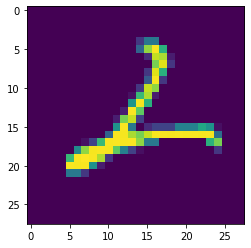

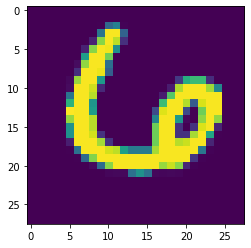

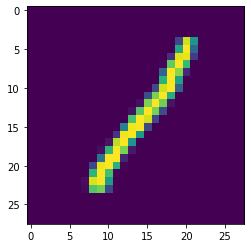

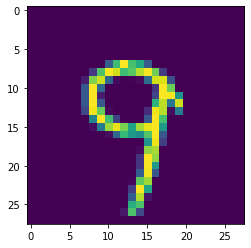

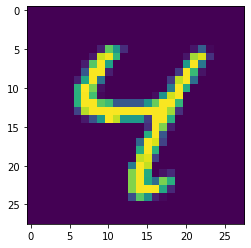

In [14]:
import idx2numpy
from keras.utils import np_utils
img_path = '/gdrive/My Drive/trialdata/t10k-images-idx3-ubyte'## write your code here
label_path = '/gdrive/My Drive/trialdata/t10k-labels-idx1-ubyte'## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)
plt.figure()
plt.imshow(Images[43])
plt.figure()
plt.imshow(Images[3665])
plt.figure()
plt.imshow(Images[354])
plt.figure()
plt.imshow(Images[2345])
## write your code here
print(labels)

index1=np.where(labels==4)
ind1=index1[0]
images1=Images[ind1,:,:]
labcl1=labels[ind1]

index2=np.where(labels==8)
ind2=index2[0]
images2=Images[ind2,:,:]
labcl2=labels[ind2]


data=np.concatenate((images1,images2))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((labcl1,labcl2))
print(G_lab.shape)



print(data.shape)
d=data[1,:]
im=np.reshape(d,(28,28))
plt.figure()
plt.imshow(im)
print(data)


plt.show()

Use the K-means clustering algorithm from the last lab to form the clusters 

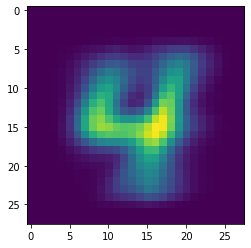

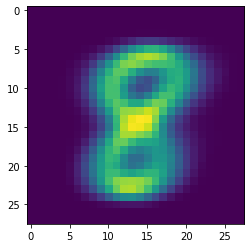

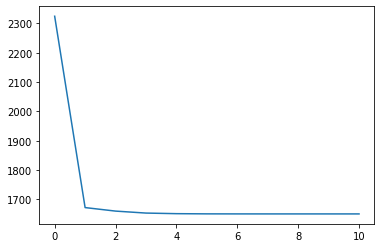

In [15]:
## write your code here

def kmnclst(x,k,nlp,precision):
  index=np.random.randint(0,x.shape[0],k)
  cntrd=x[index,:]

  distance=np.zeros((x.shape[0],k+2))
  error=[]
  data1=x+10**(-20)
  
  for n in range(nlp):
    # assignment stage
    for i in range(data1.shape[0]):
      for j in range(k):
        distance[i,j]=np.linalg.norm(data1[i,:]-cntrd[j,:])

      Dist=np.min(distance[i,:k])
      ind=int((np.where(Dist==distance[i,:k])[0]))
      distance[i,k]=ind
      distance[i,k+1]=Dist

# re-estimation stage
    for i in range(k):
      ind=np.where(distance[:,k]==i)
      if (data1[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data1.shape[0],1)
        cntrd[i,:]=data1[id1,:]
      else:
        cntrd[i,:]=np.mean(data1[ind,:][0],axis=0)

    error.append(np.mean(distance[:,k+1]))  
    # print(cntrd)

    if n>2:
      if abs(error[n]-error[n-1])<precision:
        break
  return distance, cntrd, error
    
distance,cntrd,error=kmnclst(data,2,50,10**(-10))

plt.imshow(np.reshape(cntrd[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cntrd[1,:],(28,28)))

plt.figure()
plt.plot(error)

plt.show()

In [19]:
from sklearn import metrics

pred_lab=distance[:,2]
print(pred_lab)
print(G_lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))



[0. 0. 0. ... 1. 1. 1.]
[4 4 4 ... 8 8 8]
performance= 0.7923647584296725


Initialization complete
Iteration 0, inertia 11975158387.0.
Iteration 1, inertia 5838257016.287397.
Iteration 2, inertia 5654281344.756794.
Iteration 3, inertia 5520664026.644869.
Iteration 4, inertia 5453098496.006691.
Iteration 5, inertia 5429625616.560079.
Iteration 6, inertia 5427086106.356052.
Iteration 7, inertia 5426743349.9053135.
Iteration 8, inertia 5426721991.313966.
Iteration 9, inertia 5426716542.683447.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 10900723809.0.
Iteration 1, inertia 5836758670.674072.
Iteration 2, inertia 5770793178.0606785.
Iteration 3, inertia 5713768065.836582.
Iteration 4, inertia 5652430489.837731.
Iteration 5, inertia 5549169664.311811.
Iteration 6, inertia 5466958622.893859.
Iteration 7, inertia 5436501845.311508.
Iteration 8, inertia 5429195938.689894.
Iteration 9, inertia 5427108542.84757.
Iteration 10, inertia 5426745419.384298.
Iteration 11, inertia 5426711037.914813.
Iteration 12, inertia 542670555

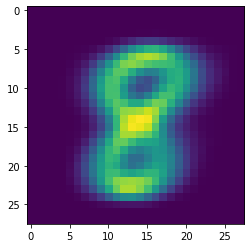

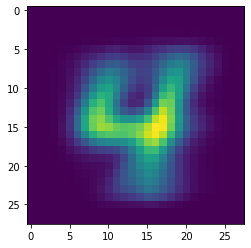

In [16]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=20,max_iter=100,verbose=1)
kmeans.fit(data)
cents=kmeans.cluster_centers_
im=np.reshape(cents[0,:],(28,28))
plt.figure()
plt.imshow(im)
im=np.reshape(cents[1,:],(28,28))
plt.figure()
plt.imshow(im)

plt.show()

Use the GMM clustering algorithm from the last lab to form the clusters

In [ ]:
def initialization(data,K):

  # write your code here
  d=data.shape[1] # dimension of data
  # print(d)


# mean initialization
  pick_means=np.random.randint(0,data.shape[0],K)
  means=data[pick_means,:]
  means=np.transpose(means)

# covariance matrix initialization
  Covariance=np.zeros((d,d,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(d)*np.max(data,axis=None)    
    
#mixing coefficients
  proportions=np.ones((K,1))/K

  theta=[means,Covariance,proportions]

  cntrd=means.T
    
  return theta


# E-Step GMMmatches_raw_df = pd.read_csv('matches.csv')
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    means=theta[0]
    Covariance=theta[1]
    proportions=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(data),K))
    for i in range(K):
        itr=0   # increase w.r.t datapoint 
        for x in data:
            normalising=0
# Compute probability of xj for cluster i 
            N_xn=multivariate_normal.pdf(x,mean=means[:,i], cov=Covariance[:,:,i])
            # # only to avoid 
            # if N_xn<10**(-20):
            #   N_xn=10**(-20)

            
            responsibility[itr][i]=proportions[i]*N_xn

            for j in range(K):
                normalising+=proportions[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=Covariance[:,:,j])+10**(-20))
            responsibility[itr][i]=responsibility[itr][i]/normalising
            itr+=1

    return responsibility


# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    [N,K]=np.shape(responsibility) #N is number of data points
    d=data.shape[1]
    
    #Compute Proportions
    Nk=np.sum(responsibility,axis=0)
    proportions=Nk/N
        
    #Compute Means
    means=np.zeros((K,d))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] #multiplying a vector with multiple columns
        means[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    means=np.transpose(means)
        
    #Compute Covariance
    Covariance=np.zeros((d,d,K))        
    for k in range(K):
        for n in range(N):
            temp1=data[n,:]-means[:,k]
            temp2=np.outer(temp1,np.transpose(temp1)) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[means,Covariance,proportions]
    Likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            Likelihood+=proportions[k]*(multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=Covariance[:,:,k]))
        log_likelihood+=np.log(Likelihood)
           
    return theta, log_likelihood

In [ ]:
log_l=[]
Itr=50
eps=10**(-10)  # for threshold
# clr=['b','m','g','r']
# mrk=['*','.','x','+']


K = 2   # no. of clusters

theta=initialization(data,K)

# print(theta)
for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  # for l in range(K):
  #   id=np.where(cluster_label==l)
  #   plt.plot(data[id,0],X[id,1],color=clr[l],marker=mrk[l])
  # cntrd=theta[0].T
  # plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')
  # plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

plt.show()

Initialization 0
  Iteration 10
Initialization converged: True


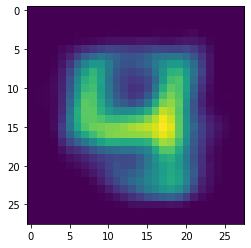

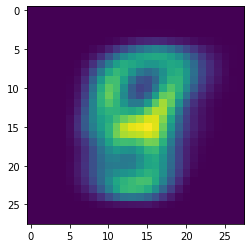

In [17]:
## write your code here
from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)
gmm.fit(data)
gmm.get_params(deep=True)
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_
im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)




In [20]:
from sklearn import metrics

pred_lab=gmm.predict(data)
print(pred_lab)
print(G_lab)
print('performance=',metrics.homogeneity_score(pred_lab,G_lab))

[1 1 1 ... 1 1 1]
[4 4 4 ... 8 8 8]
performance= 0.051884827312455244
